In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import os # operating system, to read image path 

from tensorflow.keras.utils import img_to_array,load_img  # uploading images and converting arrays
from tensorflow.keras import Sequential 

from tensorflow.keras.layers import Conv2D,Activation,Dropout,Flatten,Dense,MaxPooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical

### number of classes
We have classes with 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

and we have Number of classes of 10



In [3]:
path ="/content/drive/MyDrive/Colab Notebooks/bootcamp/Spectrograms"
className = [ int(i) for i in os.listdir(path)]
print(className)
NumberOfClass=len(className)
print("NumberOfClass: ",NumberOfClass)

[5, 4, 7, 8, 3, 1, 6, 0, 9, 2]
NumberOfClass:  10


throwing the path of the instances into a list

In [4]:
SamplePath =[]
label= []
for i in className:
    SampleName =os.listdir(path +"/"+ str(i))
    for j in SampleName:
        label.append(i)
        SamplePath.append(path + "/" + str(i) + "/" + j)

print("Sample of Path: ",len(SamplePath))  
print(SamplePath[:5])
print("Sample of Label: ",len(label))
print(label[:5])


Sample of Path:  8732
['/content/drive/MyDrive/Colab Notebooks/bootcamp/Spectrograms/5/102857-5-0-0.png', '/content/drive/MyDrive/Colab Notebooks/bootcamp/Spectrograms/5/102857-5-0-1.png', '/content/drive/MyDrive/Colab Notebooks/bootcamp/Spectrograms/5/102857-5-0-10.png', '/content/drive/MyDrive/Colab Notebooks/bootcamp/Spectrograms/5/102857-5-0-11.png', '/content/drive/MyDrive/Colab Notebooks/bootcamp/Spectrograms/5/102857-5-0-12.png']
Sample of Label:  8732
[5, 5, 5, 5, 5]


* our sample shape (374,500,3)

(374, 500, 3)


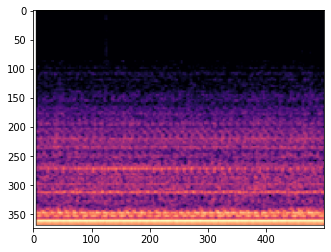

In [5]:
img = load_img(SamplePath[855])
plt.imshow(img)
img = img_to_array(img)
print(img.shape)

* We scale all sample images (128,128) to their size and read them as grayscale and convert them to numpy arrays.

In [ ]:
x_data = np.array( [np.array(img_to_array(load_img(i ,target_size=(128,128)))[:,:,0]) for i in SamplePath] )


## Normalization and Reshape

Normalization:
* We perform a grayscale normalization to reduce the effect of illumination's differences.

* If we perform normalization, CNN works faster.

Reshape
* Train and test images (128 x 128)
* We reshape all data to 128x128x1 3D matrices.
* Keras needs an extra dimension in the end which correspond to channels.
 Our images are gray scaled so it use only one channel.




In [ ]:
x_data = x_data.reshape(-1,128,128,1)/255.0 
y_data =np.array(label).reshape(-1,1)

## Let's save the data in numpy array and csv format
 * In order to save it as csv, we need to make the data 2 dimensional.




In [ ]:
imgArray =np.save("imgArray.npy",x_data)
LabelArray =np.save("LabelArray.npy",y_data)


x_data= x_data.reshape((8732,128*128))
df = pd.DataFrame(x_data)
df["Label"] =y_data

df.to_csv("data.csv")

## Loading the Data Set


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bootcamp/data.csv")


In [7]:
data.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Label
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


### Cleaning Data

In [8]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [9]:
x =data.drop("Label",axis=1).values
x= x.reshape(-1,128,128,1)
y =data["Label"]
print("X shape: ",x.shape)
print("Y shape: ",y.shape)


X shape:  (8732, 128, 128, 1)
Y shape:  (8732,)


Label Encoding
Encode labels to one hot vectors

2 => [0,0,1,0,0,0,0,0,0,0]

4 => [0,0,0,0,1,0,0,0,0,0]

In [10]:
NumberOfClass =len(set(y))
y= to_categorical(y,num_classes= len(set(y)))

In [11]:
print("Y shape: ",y.shape)


Y shape:  (8732, 10)


## Train Test Split
* We split the data into train and test sets.

test size is 10%.

train size is 90%

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [13]:
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
print("number_of_train",number_of_train)
print("number_of_test",number_of_test)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

number_of_train 7858
number_of_test 874
x_train shape (7858, 128, 128, 1)
x_test shape (874, 128, 128, 1)
y_train shape (7858, 10)
y_test shape (874, 10)


# Create Model


In [45]:
model = Sequential()
model.add(Conv2D(input_shape = (128,128,1),filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Conv2D(filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Conv2D(filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Conv2D(filters=64,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(units=NumberOfClass))   # çıkış sayısı layer kadar olması lazım
model.add(Activation("softmax"))

## Define Optimizer
Adam optimizer: Change the learning rate

In [46]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

### Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

In [47]:
epochs = 50  # for better result increase the epochs
batch_size =25

## Fit the model

In [48]:
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

Epoch 1/50
315/315 [==============================] - 10s 29ms/step - loss: 1.7574 - accuracy: 0.3689 - val_loss: 3.1623 - val_accuracy: 0.0446
Epoch 2/50
315/315 [==============================] - 9s 29ms/step - loss: 1.2544 - accuracy: 0.5491 - val_loss: 1.3007 - val_accuracy: 0.5069
Epoch 3/50
315/315 [==============================] - 9s 28ms/step - loss: 1.0310 - accuracy: 0.6415 - val_loss: 1.0425 - val_accuracy: 0.6304
Epoch 4/50
315/315 [==============================] - 9s 28ms/step - loss: 0.9221 - accuracy: 0.6859 - val_loss: 0.8995 - val_accuracy: 0.6533
Epoch 5/50
315/315 [==============================] - 9s 29ms/step - loss: 0.8145 - accuracy: 0.7189 - val_loss: 0.6091 - val_accuracy: 0.7975
Epoch 6/50
315/315 [==============================] - 9s 28ms/step - loss: 0.7658 - accuracy: 0.7380 - val_loss: 0.7154 - val_accuracy: 0.7609
Epoch 7/50
315/315 [==============================] - 9s 28ms/step - loss: 0.6837 - accuracy: 0.7674 - val_loss: 0.5971 - val_accuracy: 0.804

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


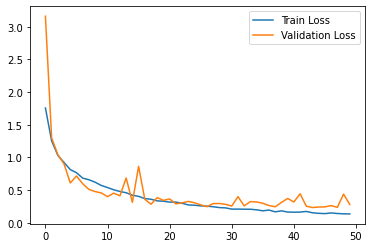

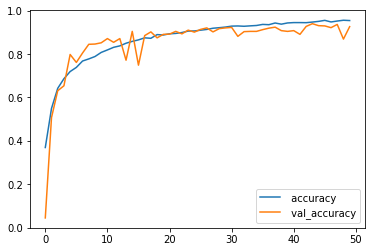

In [49]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label ="Train Loss")
plt.plot(hist.history["val_loss"],label ="Validation Loss")
plt.legend()
plt.figure()
plt.plot(hist.history["accuracy"],label =" accuracy")
plt.plot(hist.history["val_accuracy"],label =" val_accuracy")
plt.legend()
plt.show()